# BIOE97142 Programming Exam 2022

This exam consists of **four** parts focusing on:

(a) Setting up and loading data into a Pandas dataframe <br>
(b) Calculating descriptive statistics <br>
(c) Data visualization <br>
(d) Performing inferential statistics <br>

*Note*: All parts use the same dataset for each section

**Exam total of 40 points**

5 points - Part (a) <br> 
10 points - Part (b) <br>
10 points - Part (c) <br>
10 points - Part (d) <br> 
5 points - Overall code legibility (Commenting)

You will have a total of **30 minutes** to complete this exam.
    

### Part (a) - Setting up and Loading Data:

1. Import numpy, matplotlib.pyplot, pandas, and scipy.stats **(1 point)**
<br>

2. Load the file "exam_data_2022.xlsx" into a Pandas dataframe   **(3 points)**
<br>

3. Show the dataframe in the Jupyter Notebook output **(1 point)**
______________________________________________________________________________________________________________________

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [2]:
df = pd.read_excel("exam_data_2022.xlsx")

df

Unnamed: 0  Time (min)  Material 1 Sample 1 (uM)  Material 1 Sample 2 (uM)  \
0         NaN           1                       0.0                       0.2   
1         NaN           5                       1.4                       3.1   
2         NaN          10                       3.2                       5.7   
3         NaN          15                       5.8                       7.9   
4         NaN          30                       8.9                      10.3   
5         NaN          60                      10.7                      11.2   
6         NaN         120                      10.8                      11.4   

   Material 1 Sample 3 (uM)  Material 2 Sample 1 (uM)  \
0                       0.1                       4.2   
1                       2.1                      10.4   
2                       4.8                      20.6   
3                       6.3                      25.8   
4                       9.4                      31.8   
5                      10.9                      35.8   
6                      11.5                      36.8   

   Material 2 Sample 2 (uM)  Material 2 Sample 3 (uM)  \
0                       6.9                       7.2   
1                      13.8                      12.3   
2                      24.7                      25.8   
3                      30.3                      31.8   
4                      33.2                      34.2   
5                      37.1                      39.7   
6                      39.2                      40.1   

   Material 3 Sample 1 (uM)  Material 3 Sample 2 (uM)  \
0                       2.3                       4.3   
1                      20.8                      22.7   
2                      40.2                      50.8   
3                      55.6                      62.8   
4                      63.8                      67.9   
5                      70.4                      72.4   
6                      70.2                      73.5   

   Material 3 Sample 3 (uM)  
0                       1.9  
1                      24.1  
2                      43.2  
3                      63.9  
4                      70.1  
5                      74.5  
6                      76.2

### Part (b) - Descriptive Statistics:

#### Important: Ensure that you read the column labels in the dataset! 

#### Each column corresponds to drug release values measured at a time point (specified in the 'Time' column). The first column is the 'Time' column. The next three (3) columns correspond to the drug release data from three samples of Material 1, the following three (3) columns correspond to drug release data from three samples of Material 2, and so on for Material 3. 


1. Find the mean and standard deviation at the final time (t = 120 minutes) for each material type                        **(4 points)**
<br>

2. Use for loops and if statements to find which values at the final time (t = 120 minutes) are more or less than one (1) standard deviations away from their respective means for each material type       **(4 points)**
<br>    
3. Print these values, their material and sample number, and the difference between the value and mean to your Jupyter Notebook output                                            **(2 points)**

______________________________________________________________________________________________________________________

In [71]:
means = [df[df["Time (min)"] == 120].iloc[:,i*3+2:i*3+5].mean(axis=1).iloc[0] for i in range(3)]
stds = [df[df["Time (min)"] == 120].iloc[:,i*3+2:i*3+5].std(axis=1).iloc[0] for i in range(3)]
# df[df["Time (min)"] == 120].mean("Material 1 Sample 1 (uM)")


# means, stds
means, stds

([11.233333333333334, 38.699999999999996, 73.3],
 [0.3785938897200179, 1.7058722109232007, 3.0049958402633434])

In [74]:
for i in range(1, 4):
    for j in range(1, 4):
        val = df[df["Time (min)"] == 120][f"Material {i} Sample {j} (uM)"].iloc[0]
        diff = np.abs(val - means[i-1])
        if diff > stds[i-1]:
            print(f"Material {i} Sample {j}: value={val} dif={diff:.2f}")

Material 1 Sample 1: value=10.8 dif=0.43
Material 2 Sample 1: value=36.8 dif=1.90
Material 3 Sample 1: value=70.2 dif=3.10


### Part (c) - Data Visualization:
    
Plot the data using appropriate labelling (**must include** x-axis title, y-axis title, title, legend) in a single **vertical** figure (i.e. with one plot on top of the other) using the following as subplots: <br>

*Note*: **Time** is measured in **minutes** and **Drug concentration** is measured in **uM**
    
1. Subplot 1 - Plot each sample column for all materials as a separate line on the same plot (Y-axis = Drug concentration, X-axis = Time) **(5 points)**
<br>
    
2. Subplot 2 - Plot the mean of each timepoint for the three material types as errorbar plots with standard deviations as error values (Y-axis = Drug concentration, X-axis = Time)        **(5 points)**
                                              
______________________________________________________________________________________________________________________

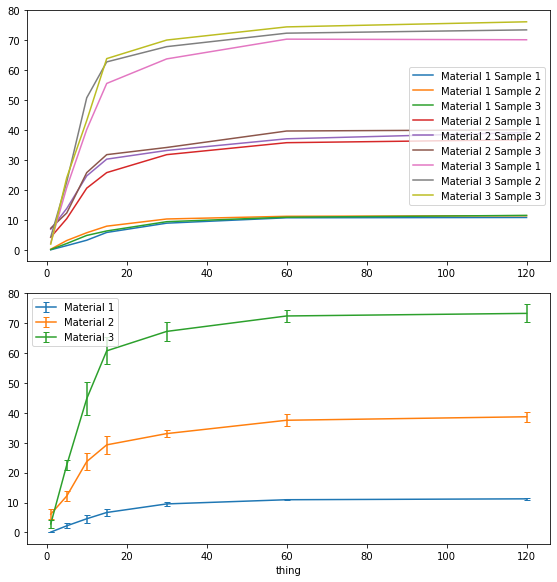

In [123]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.tight_layout()

for i in range(2,11):
    r, c = divmod(i-2, 3)
    axs[0].plot(df["Time (min)"], df.iloc[:,i], label=f"Material {r+1} Sample {c+1}")
    axs[0].legend()
    plt.xlabel("thing")
    
for i in range(2, 11, 3):
    axs[1].errorbar(df["Time (min)"], df.iloc[:,i:i+3].mean(axis=1), yerr=df.iloc[:,i:i+3].std(axis=1), 
                    capsize=3, label=f"Material {i // 3 + 1}")
    axs[1].legend()

plt.show()

### Part (d) - Inferential Statistics:
    
1. Determine if the data points at the final time (t = 120 minutes) for each material type are normally distributed using a Shapiro-Wilk test    **(2 points)**
<br>

2. Run a one way ANOVA between these same data points (α = 0.05)                **(2 points)**
<br>  

3. Perform Bonferroni Correction post-hoc tests to determine inter group significance for all possible combinations of these same data points (i.e. between Material 1, Material 2, and Material 3)   **(4 points)**
<br>  

4. Comment on the results of the post-hoc test                                             **(2 points)**

______________________________________________________________________________________________________________________

In [126]:
for i in range(2, 11, 3):
    print(stats.shapiro(df.iloc[-1, i:i+3]))

(0.8546507358551025, 0.25296738743782043)
(0.9355669617652893, 0.5098437070846558)
(0.9966776967048645, 0.8898539543151855)


In [129]:
# Normal ANOVA since data is normally dsitributed
stats.f_oneway(*[df.iloc[-1,i:i+3] for i in range(2,11,3)])

F_onewayResult(statistic=720.4777931034394, pvalue=7.129977325553553e-08)

In [137]:
ca = 0.05 / 3
print(f"Corrected alpha level: {ca}")

for i, j in [(2,5), (2,8), (5, 8)]:
    if stats.ttest_ind(df.iloc[-1, i:i+3], df.iloc[-1, j:j+3]).pvalue < ca:
        print(f"Significant difference between {i // 3 + 1} and {j // 3 + 1}")

Corrected alpha level: 0.016666666666666666
Significant difference between 1 and 2
Significant difference between 1 and 3
Significant difference between 2 and 3
